In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file='S02-hw-dataset.csv'
df = pd.read_csv(file,sep =',')
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [142]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [143]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [144]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [145]:
malfunctions = df[(df['age'].isna()) | (df['age']>100) | (df['purchases']<0) | (df['revenue']<0)  | ((df['revenue']==0)&(df['purchases']!=0))]
malfunctions


,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0
12,13,NaN,US,9,630


#Ошибки
##Были обнаружены следующие ошибки: 
Неуказанный возраст, возраст превышающий 100, отрицательные покупки и нулевой доход при 4 продажах 

In [146]:
df.value_counts('country')

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [147]:
df.value_counts('country')

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [148]:
group = df.groupby('country')
group['revenue'].mean()

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

In [149]:
group['purchases'].mean()

country
CN    4.500000
DE    6.500000
FR    4.250000
RU    4.769231
US    4.625000
Name: purchases, dtype: float64

#Группировка
##Доминируют: 
Возраст 24 года в возрастной категории, Россия и Франция в категории стран, Германия в среднем значении доходов
##Отличия:
США сильно отстают по доходам от Китая и Германии, мало данных для Китая, среднее количество продаж для всех стран помимо Германии схоже

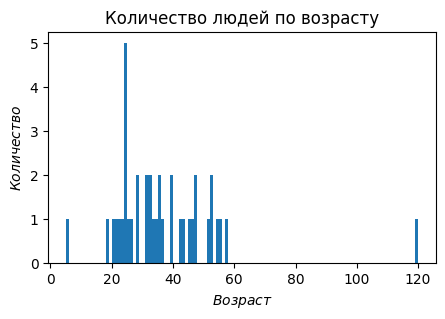

In [150]:
fig, ax = plt.subplots(figsize=(5,3))
ax.hist(
    df['age'], bins=np.arange(df['age'].min(), df['age'].max()+1),
)
ax.set_xlabel('$Возраст$')
ax.set_ylabel('$Количество$')
ax.set_title('Количество людей по возрасту')
plt.savefig('figures/hist.png')
plt.show()

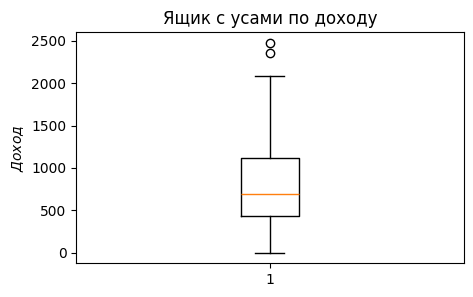

In [151]:
fig, ax = plt.subplots(figsize=(5,3))
ax.boxplot(df['revenue'])
ax.set_ylabel('$Доход$')
ax.set_title('Ящик с усами по доходу')
plt.savefig('figures/box.png')
plt.show()

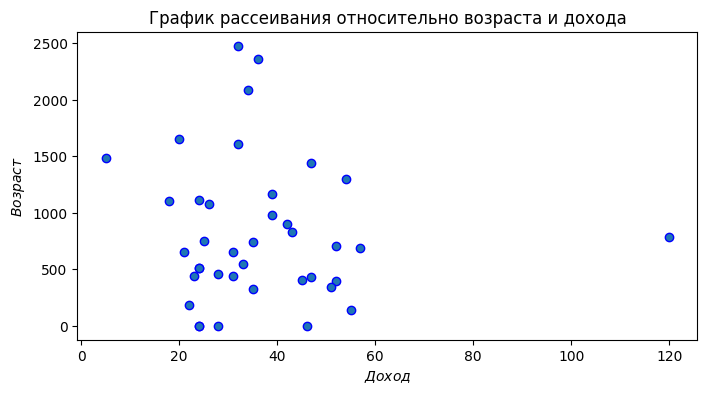

In [152]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x=df['age'], y=df['revenue'], marker='o', edgecolor='b')
ax.set_title('График рассеивания относительно возраста и дохода')
ax.set_xlabel('$Доход$')
ax.set_ylabel('$Возраст$')
plt.savefig('figures/scatter.png')
plt.show()